<a href="https://colab.research.google.com/github/Kevangi/face-region-segmentation/blob/main/face_region_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe==0.10.13

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grain 0.2.15 requires protobuf>=5.28.3, but you have protobuf 4.25.8 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 4.25.8 which is incompatible.
ydf 0.14.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.


In [1]:
import mediapipe as mp
print("MediaPipe version:", mp.__version__)
print("Has solutions:", hasattr(mp, "solutions"))

MediaPipe version: 0.10.13
Has solutions: True


In [2]:
mp_selfie = mp.solutions.selfie_segmentation

selfie_seg = mp_selfie.SelfieSegmentation(model_selection=1)
print("SelfieSegmentation ready ✅")

SelfieSegmentation ready ✅


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kevangipatel","key":"abf434d588fdd6ab1de8e8b058632ee4"}'}

In [4]:
!ls

kaggle.json  sample_data


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list | head

ref                                                             title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
saidaminsaidaxmadov/chocolate-sales                             Chocolate Sales                                       468320  2026-01-04 14:23:35.490000          16818        301  1.0              
aliiihussain/amazon-sales-dataset                               Amazon_Sales_Dataset                                 1297759  2026-02-01 11:37:12.353000           3297         61  1.0              
hassanjameelahmed/price-of-healthy-diet-clean                   Global Healthy Diet Cost Analysis (2017–2024)          14103  2026-02-05 07:18:40.347000            540         22  1.0              
ayeshaimra

In [7]:
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs

Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
  0% 0.00/113M [00:00<?, ?B/s]
100% 113M/113M [00:00<00:00, 1.35GB/s]


In [8]:
!unzip cuhk-face-sketch-database-cufs.zip -d cuhk-face-sketch-database-cufs

Streaming output truncated to the last 5000 lines.
  inflating: cuhk-face-sketch-database-cufs/cropped_sketch/00726.jpg  
  inflating: cuhk-face-sketch-database-cufs/cropped_sketch/00727.jpg  
  inflating: cuhk-face-sketch-database-cufs/cropped_sketch/00728.jpg  
  inflating: cuhk-face-sketch-database-cufs/cropped_sketch/00729.jpg  
  inflating: cuhk-face-sketch-database-cufs/cropped_sketch/00730.jpg  
  inflating: cuhk-face-sketch-database-cufs/cropped_sketch/00731.jpg  
  inflating: cuhk-face-sketch-database-cufs/cropped_sketch/00732.jpg  
  inflating: cuhk-face-sketch-database-cufs/cropped_sketch/00733.jpg  
  inflating: cuhk-face-sketch-database-cufs/cropped_sketch/00734.jpg  
  inflating: cuhk-face-sketch-database-cufs/cropped_sketch/00735.jpg  
  inflating: cuhk-face-sketch-database-cufs/cropped_sketch/00736.jpg  
  inflating: cuhk-face-sketch-database-cufs/cropped_sketch/00737.jpg  
  inflating: cuhk-face-sketch-database-cufs/cropped_sketch/00738.jpg  
  inflating: cuhk-face-ske

In [9]:
ls

cuhk-face-sketch-database-cufs/     kaggle.json
cuhk-face-sketch-database-cufs.zip  sample_data/


In [10]:
ls cuhk-face-sketch-database-cufs

cropped_sketch/   photo/         photos/  sketches/
original_sketch/  photo_points/  sketch/  sketch_points/


In [11]:
ls cuhk-face-sketch-database-cufs/photos

f-005-01.jpg  f-043-01.jpg   m-031-01.jpg  m-069-01.jpg   m1-007-01.jpg
f-006-01.jpg  f1-001-01.jpg  m-032-01.jpg  m-070-01.jpg   m1-008-01.jpg
f-007-01.jpg  f1-002-01.jpg  m-033-01.jpg  m-071-01.jpg   m1-009-01.jpg
f-008-01.jpg  f1-003-01.jpg  m-034-01.jpg  m-072-01.jpg   m1-010-01.jpg
f-009-01.jpg  f1-004-01.jpg  m-035-01.jpg  m-073-01.jpg   m-101-01.jpg
f-010-01.jpg  f1-005-01.jpg  m-036-01.jpg  m-074-01.jpg   m1-011-01.jpg
f-011-01.jpg  f1-006-01.jpg  m-037-01.jpg  m-075-01.jpg   m1-012-01.jpg
f-012-01.jpg  f1-007-01.jpg  m-038-01.jpg  m-076-01.jpg   m1-013-01.jpg
f-013-01.jpg  f1-008-01.jpg  m-039-01.jpg  m-077-01.jpg   m1-014-01.jpg
f-014-01.jpg  f1-009-01.jpg  m-040-01.jpg  m-078-01.jpg   m1-015-01.jpg
f-015-01.jpg  f1-010-01.jpg  m-041-01.jpg  m-079-01.jpg   m1-016-01.jpg
f-016-01.jpg  f1-011-01.jpg  m-042-01.jpg  m-080-01.jpg   m1-017-01.jpg
f-017-01.jpg  f1-012-01.jpg  m-043-01.jpg  m-081-01.jpg   m1-018-01.jpg
f-018-01.jpg  f1-013-01.jpg  m-044-01.jpg  m-082-01.jpg   m1-019-

In [12]:
ls cuhk-face-sketch-database-cufs/sketches

f-039-01-sz1.jpg   F2-032-01-sz1.jpg  m1-003-01-sz1.jpg  M2-015-01-sz1.jpg
f-040-01-sz1.jpg   F2-033-01-sz1.jpg  m1-004-01-sz1.jpg  M2-016-01-sz1.jpg
f-041-01-sz1.jpg   F2-034-01-sz1.jpg  m1-005-01-sz1.jpg  M2-017-01-sz1.jpg
f-042-01-sz1.jpg   F2-035-01-sz1.jpg  m1-006-01-sz1.jpg  M2-018-01-sz1.jpg
f-043-01-sz1.jpg   F2-036-01-sz1.jpg  m1-007-01-sz1.jpg  M2-019-01-sz1.jpg
f1-001-01-sz1.jpg  F2-037-01-sz1.jpg  m1-008-01-sz1.jpg  M2-021-01-sz1.jpg
f1-002-01-sz1.jpg  F2-038-01-sz1.jpg  m1-009-01-sz1.jpg  M2-022-01-sz1.jpg
f1-003-01-sz1.jpg  m-063-01-sz1.jpg   m1-010-01-sz1.jpg  M2-023-01-sz1.jpg
f1-004-01-sz1.jpg  m-064-01-sz1.jpg   m-101-01-sz1.jpg   M2-024-01-sz1.jpg
f1-005-01-sz1.jpg  m-065-01-sz1.jpg   m1-011-01-sz1.jpg  M2-025-01-sz1.jpg
f1-006-01-sz1.jpg  m-066-01-sz1.jpg   m1-012-01-sz1.jpg  M2-026-01-sz1.jpg
f1-007-01-sz1.jpg  m-067-01-sz1.jpg   m1-013-01-sz1.jpg  M2-027-01-sz1.jpg
f1-008-01-sz1.jpg  m-068-01-sz1.jpg   m1-014-01-sz1.jpg  M2-028-01-sz1.jpg
f1-009-01-sz1.jpg  m-069-

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import re

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [14]:
!wget -q https://storage.googleapis.com/mediapipe-models/image_segmenter/selfie_multiclass_256x256/float16/1/selfie_multiclass_256x256.tflite

In [15]:
IMG_SIZE = 256

PHOTO_DIR = "/content/cuhk-face-sketch-database-cufs/photos"

In [16]:
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(data, key=alphanum_key)

photo_files = sorted_alphanumeric(os.listdir(PHOTO_DIR))
print("Total images:", len(photo_files))

Total images: 188


In [18]:
mp_selfie = mp.solutions.selfie_segmentation

selfie_seg = mp_selfie.SelfieSegmentation(
    model_selection=1
)

In [19]:
def create_face_hair_mask(image):
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = selfie_seg.process(rgb)

    if result.segmentation_mask is None:
        return np.zeros(image.shape[:2], dtype=np.uint8)

    mask = (result.segmentation_mask > 0.5).astype(np.uint8) * 255
    return mask

In [20]:
X, Y = [], []

for file in tqdm(photo_files, desc="Preparing face+hair segmentation"):
    img = cv2.imread(os.path.join(PHOTO_DIR, file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    mask = create_face_hair_mask(img)
    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))

    X.append(img / 255.0)
    Y.append(mask / 255.0)

X = np.array(X, dtype=np.float32)
Y = np.expand_dims(np.array(Y, dtype=np.float32), axis=-1)

print("X shape:", X.shape)
print("Y shape:", Y.shape)

Preparing face+hair segmentation: 100%|██████████| 188/188 [00:02<00:00, 65.77it/s] 


X shape: (188, 256, 256, 3)
Y shape: (188, 256, 256, 1)


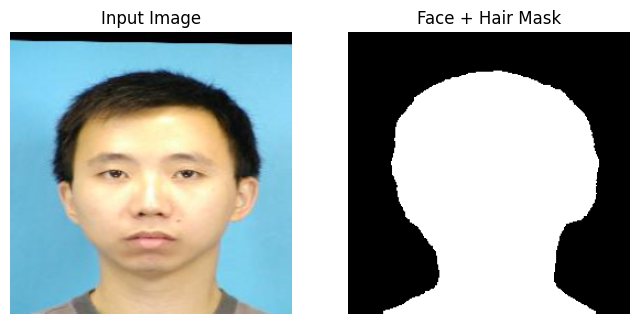

In [24]:
idx = np.random.randint(0, len(X))

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(X[idx])
plt.title("Input Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(Y[idx].squeeze(), cmap="gray")
plt.title("Face + Hair Mask")
plt.axis("off")

plt.show()

In [25]:
np.save("/content/X_faces.npy", X)
np.save("/content/Y_masks.npy", Y)

print("Face + hair segmentation dataset saved")

Face + hair segmentation dataset saved
